In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')

In [3]:
plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

In [4]:
import wordcloud, missingno
from wordcloud import WordCloud # wordcloud
import missingno as msno # check missing value
import networkx as nx

In [5]:
#Plotly visualization
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

In [6]:
import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)
'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [7]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [8]:
#numerical
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [9]:
#categorical
df.describe(include='O')

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


<AxesSubplot:>

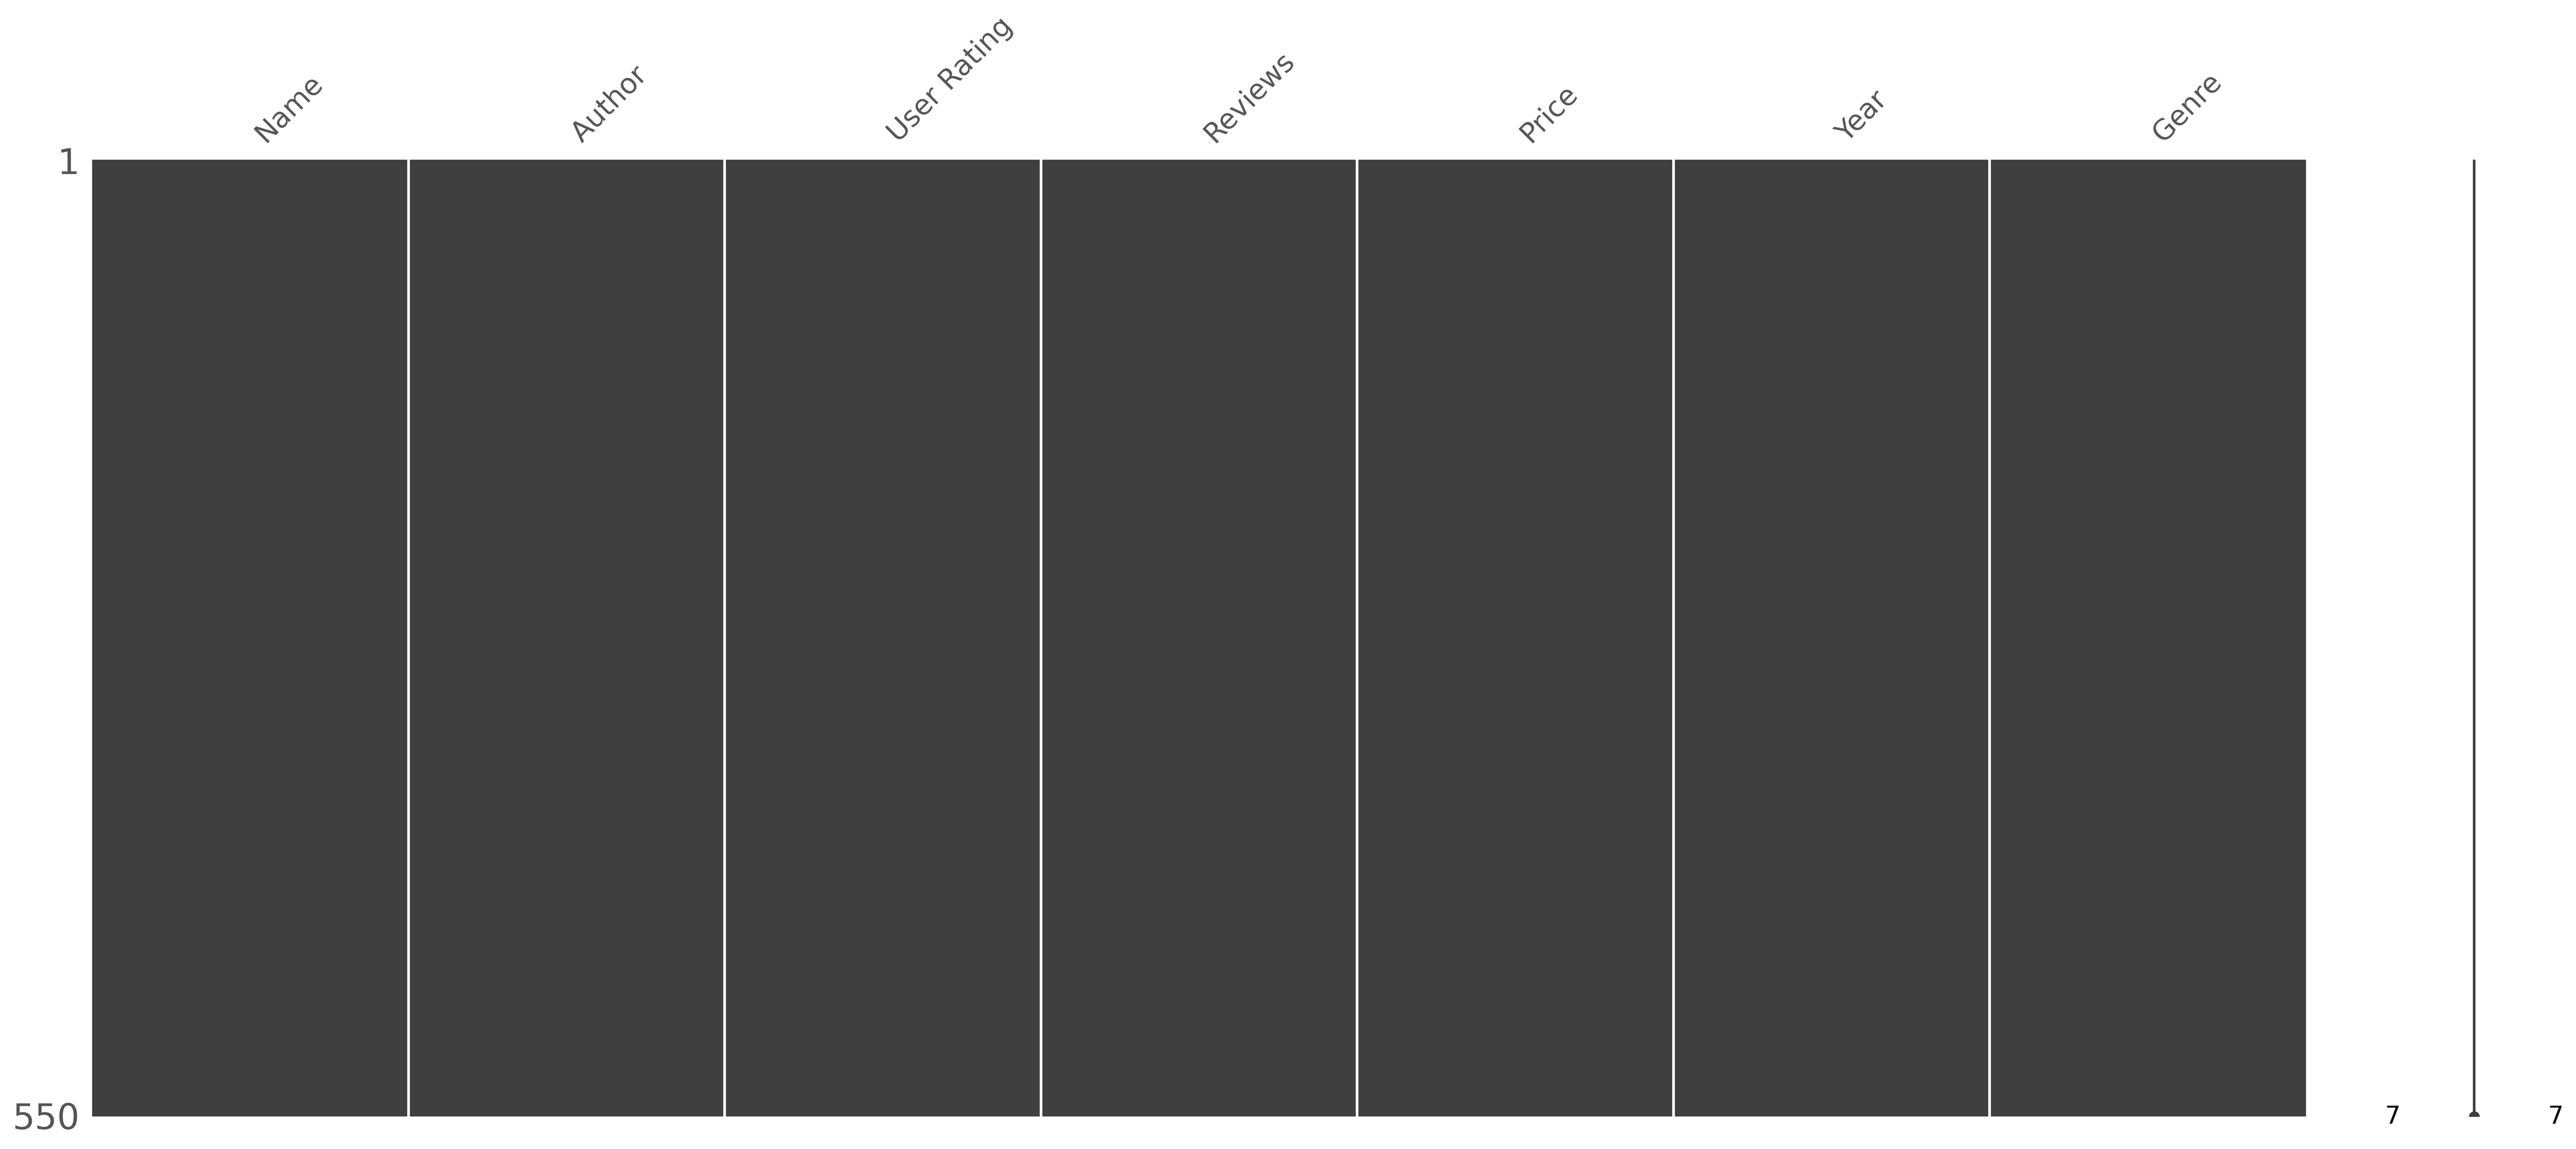

In [10]:
#checking missing data
msno.matrix(df)

#data has no missing values.

In [11]:
#BestSeller rating coutning
temp_df = df['User Rating'].value_counts().reset_index()

# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['User Rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'RATINGS COUNT' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace
bold("**MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8**")
py.iplot([pie_plot(df['User Rating'].value_counts(), 'Rating')])

**MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8**

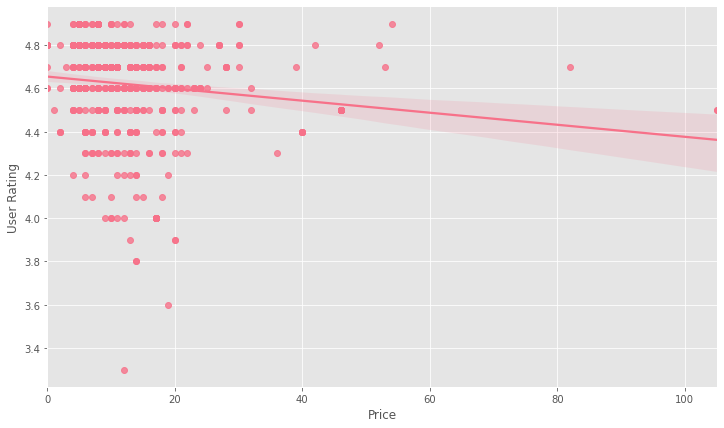

In [12]:
#Relationship between Price and User Rating
#Used regplot as a simple plot for this
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=df, x='Price', y='User Rating', ax=ax)
plt.show()


#The User Ratings tend to show a slight negative correlation with Price of the Bestselling Book.
#Most of the books are in the 'Less than 50" price range ,so not much conclusion can be drawn.

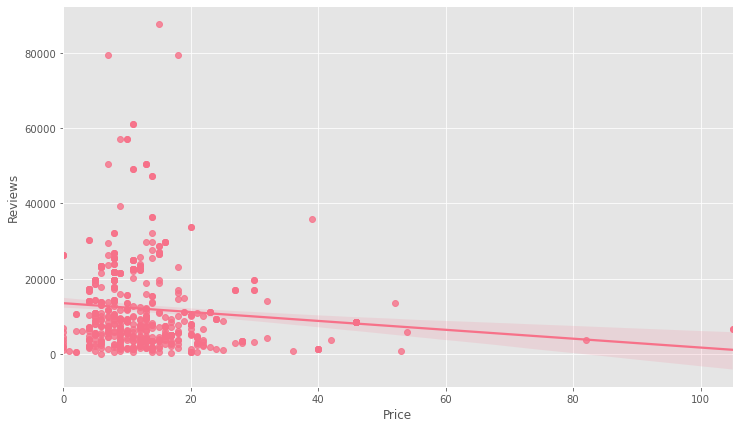

In [13]:
#Relationship between Price and Reviews:

fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=df, x='Price', y='Reviews', ax=ax)
plt.show()

#Reviews and Price also tend to show an almost similar correlation as User Rating and Price.But 
#again as most of the Bestsellers are crowded in a lower Price range,we can't conclude much.

In [14]:
#FICTION AND NON-FICTION BESTSELLERS

temp_df = df['Genre'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['Genre'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark", xaxis = dict(title = 'Genre'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold("**NON-FICTION BESTSELLERS ARE MORE THAN FICTION**")
py.iplot([pie_plot(df['Genre'].value_counts(), ['blue', 'red'], 'GENRE')])

**NON-FICTION BESTSELLERS ARE MORE THAN FICTION**

In [ ]:
#The number of bestselling books' count is constant ,i.e. 50 for all the years.
#Their distribution with Genre can be seen the above plots.

In [15]:
temp_df1 = df['Year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['Year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'BESTSELLERS COUNT OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
d1 = df[df["Genre"] == "Fiction"]
d2 = df[df["Genre"] == "Non Fiction"]

col ="Year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Non Fiction", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'GENRE BASED BESTSELLERS COUNT OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()


Text(0, 0.5, 'Reviews of books')

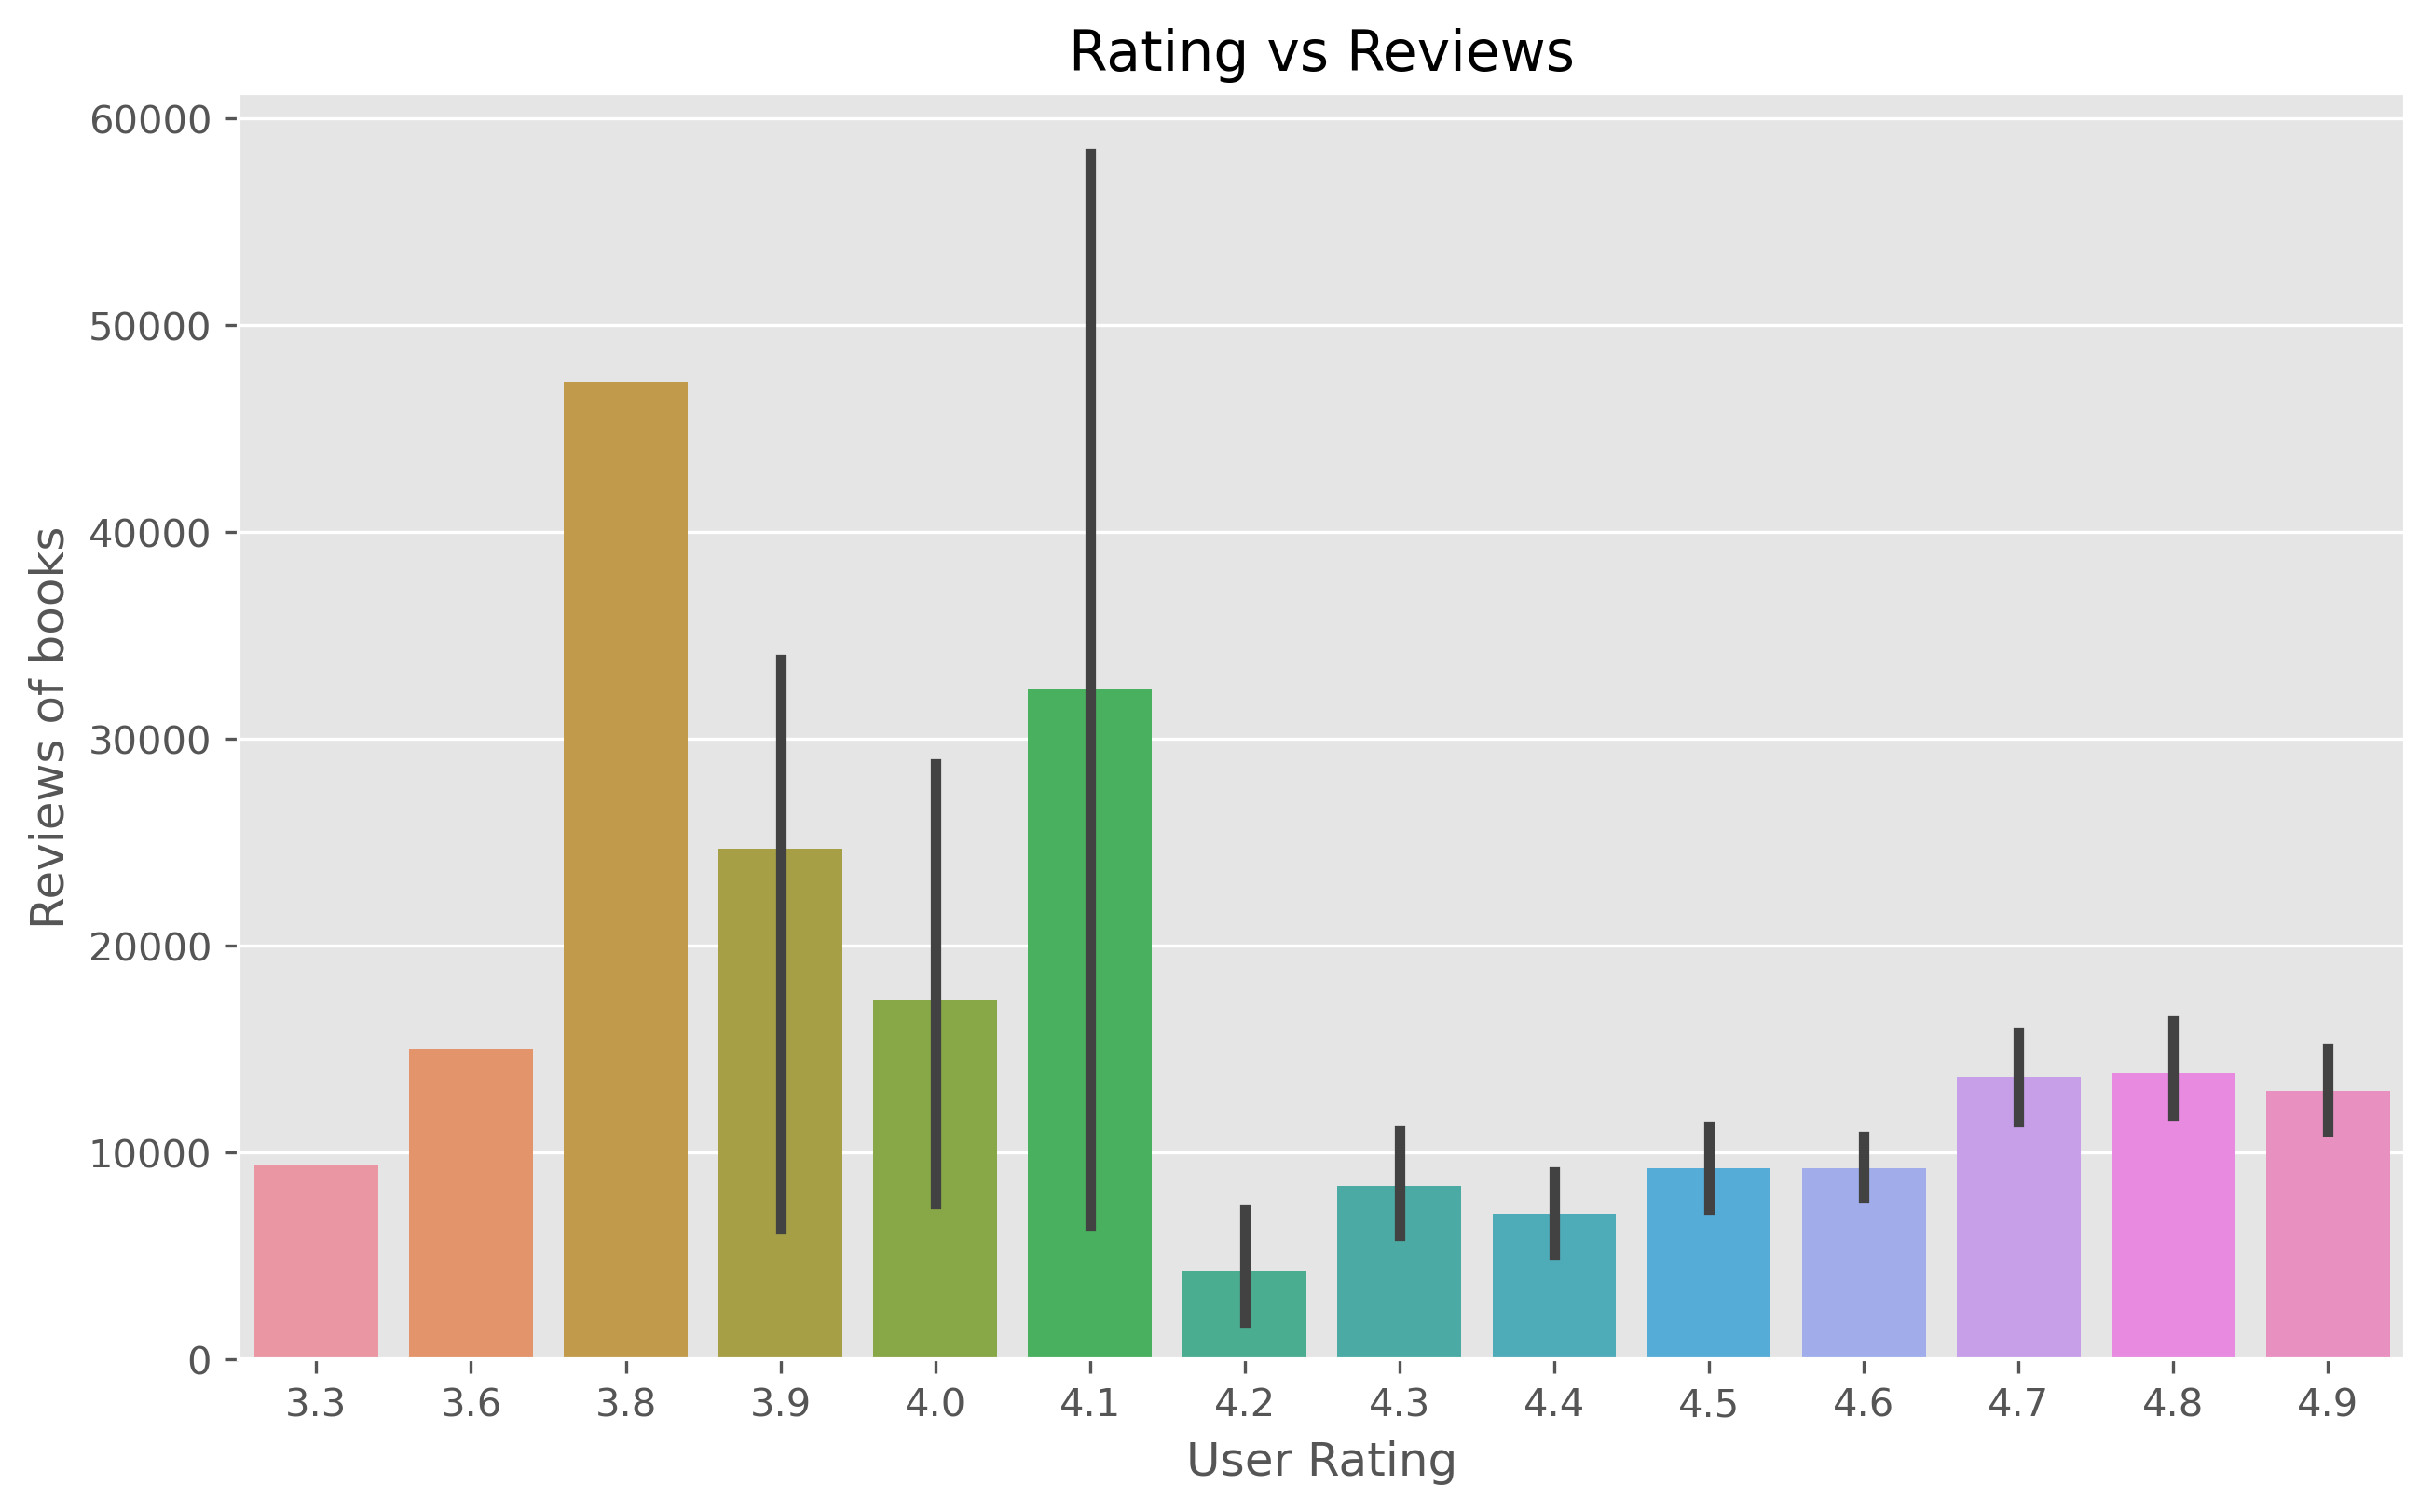

In [16]:
#Rating vs Reviews
plt.figure(figsize=(10,6))
# Add title
plt.title("Rating vs Reviews")
#Bar chart
sns.barplot(x=df['User Rating'], y=df['Reviews'])
# Add label for vertical axis
plt.ylabel("Reviews of books")

In [44]:
#Fiction and NON-fiction best seller

df1 = df[df["Genre"] == "Fiction"]
df2 = df[df["Genre"] == "Non Fiction"]

temp_df1 = df1['User Rating'].value_counts().reset_index()
temp_df2 = df2['User Rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['User Rating'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['User Rating'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'RATING BY GENRE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [ ]:
#For ratings less than 4.8,Non-Fiction books count overpowers Fiction books.
#But the reverse can be seen for the ratings-4.8 and 4.9.This is an important point as ,
#earlier we have seen that non-fiction books have an overall higher count in the entire dataset.

In [48]:
#TOP 7 MULTIPLE TIMES BESTSELLERS
books=df['Name'].value_counts()[df['Name'].value_counts()>5].index
for i in list(books):
    display(df[df['Name']==i])

,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
304,StrengthsFinder 2.0,Gallup,4.0,5069,17,2009,Non Fiction
305,StrengthsFinder 2.0,Gallup,4.0,5069,17,2010,Non Fiction
306,StrengthsFinder 2.0,Gallup,4.0,5069,17,2011,Non Fiction
307,StrengthsFinder 2.0,Gallup,4.0,5069,17,2012,Non Fiction
308,StrengthsFinder 2.0,Gallup,4.0,5069,17,2013,Non Fiction
309,StrengthsFinder 2.0,Gallup,4.0,5069,17,2014,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
311,StrengthsFinder 2.0,Gallup,4.0,5069,17,2016,Non Fiction
312,StrengthsFinder 2.0,Gallup,4.0,5069,17,2017,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
479,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
331,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2009,Non Fiction
332,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2011,Non Fiction
333,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2012,Non Fiction
334,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2013,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
336,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2016,Non Fiction
337,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2017,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
375,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2013,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
377,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2016,Non Fiction
378,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2017,Non Fiction
379,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2018,Non Fiction
380,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2019,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction


In [17]:
#REVIEWS,RATINGS AND PRICE OF BESTSELLERS:
temp_df1 = df.groupby('Year').mean().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Reviews'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'AVERAGE REVIEWS OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
temp_df1 = df.groupby('Year').mean().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Price'],
                marker = dict(color = 'rgb(148, 103, 189)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'AVERAGE PRICE OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
temp_df1 = df.groupby('Year').mean().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['User Rating'],
                marker = dict(color = 'rgb(250,13,92)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'AVERAGE RATING OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [18]:
#GENRE-BASED REVIEWS,RATINGS AND PRICE OF BESTSELLERS:
df1 = df[df["Genre"] == "Fiction"]
df2 = df[df["Genre"] == "Non Fiction"]

temp_df1 = df1.groupby('Year').mean().reset_index()
temp_df2 = df2.groupby('Year').mean().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['User Rating'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['Year'],
                y = temp_df2['User Rating'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'AVERAGE RATING BY GENRE OVER YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()
# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Reviews'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['Year'],
                y = temp_df2['Reviews'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'AVERAGE REVIEWS BY GENRE OVER YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()
# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Price'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['Year'],
                y = temp_df2['Price'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'AVERAGE PRICE BY GENRE OVER YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [19]:
#AUTHORS WITH BESTSELLERS IN BOTH THE GENRES:FICTION AND NON-FICTION

df[df['Author'].isin(list(df.groupby(['Author','Genre']).count().reset_index()['Author'].value_counts()[:2].index))]

,Name,Author,User Rating,Reviews,Price,Year,Genre
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
158,Harry Potter Coloring Book,Scholastic,4.7,3564,9,2015,Non Fiction
268,Pokémon Deluxe Essential Handbook: The Need-to...,Scholastic,4.7,3503,9,2016,Fiction
514,Ultimate Sticker Book: Frozen: More Than 60 Re...,DK,4.5,2586,5,2014,Fiction


In [20]:
#The best 20 Authors and Books¶
#Finally, after we carefully examined and analyzed the data, it's time to identify the 20 best authors 
#and the 20 best books over the 11 years (2009 to 2019).

b_author = df.drop_duplicates('Name').groupby('Author').agg({'User Rating':'mean','Author':'size','Reviews':'sum'})
b_author.columns = ['User Rating', 'no_books','Reviews']
b_author['total_score'] = ((b_author-b_author.min())/(b_author.max()-b_author.min())).sum(axis=1)
b_author = b_author.sort_values('total_score',ascending=False).head(20).sort_values('total_score')
b_author = b_author[['total_score','User Rating','no_books','Reviews']]

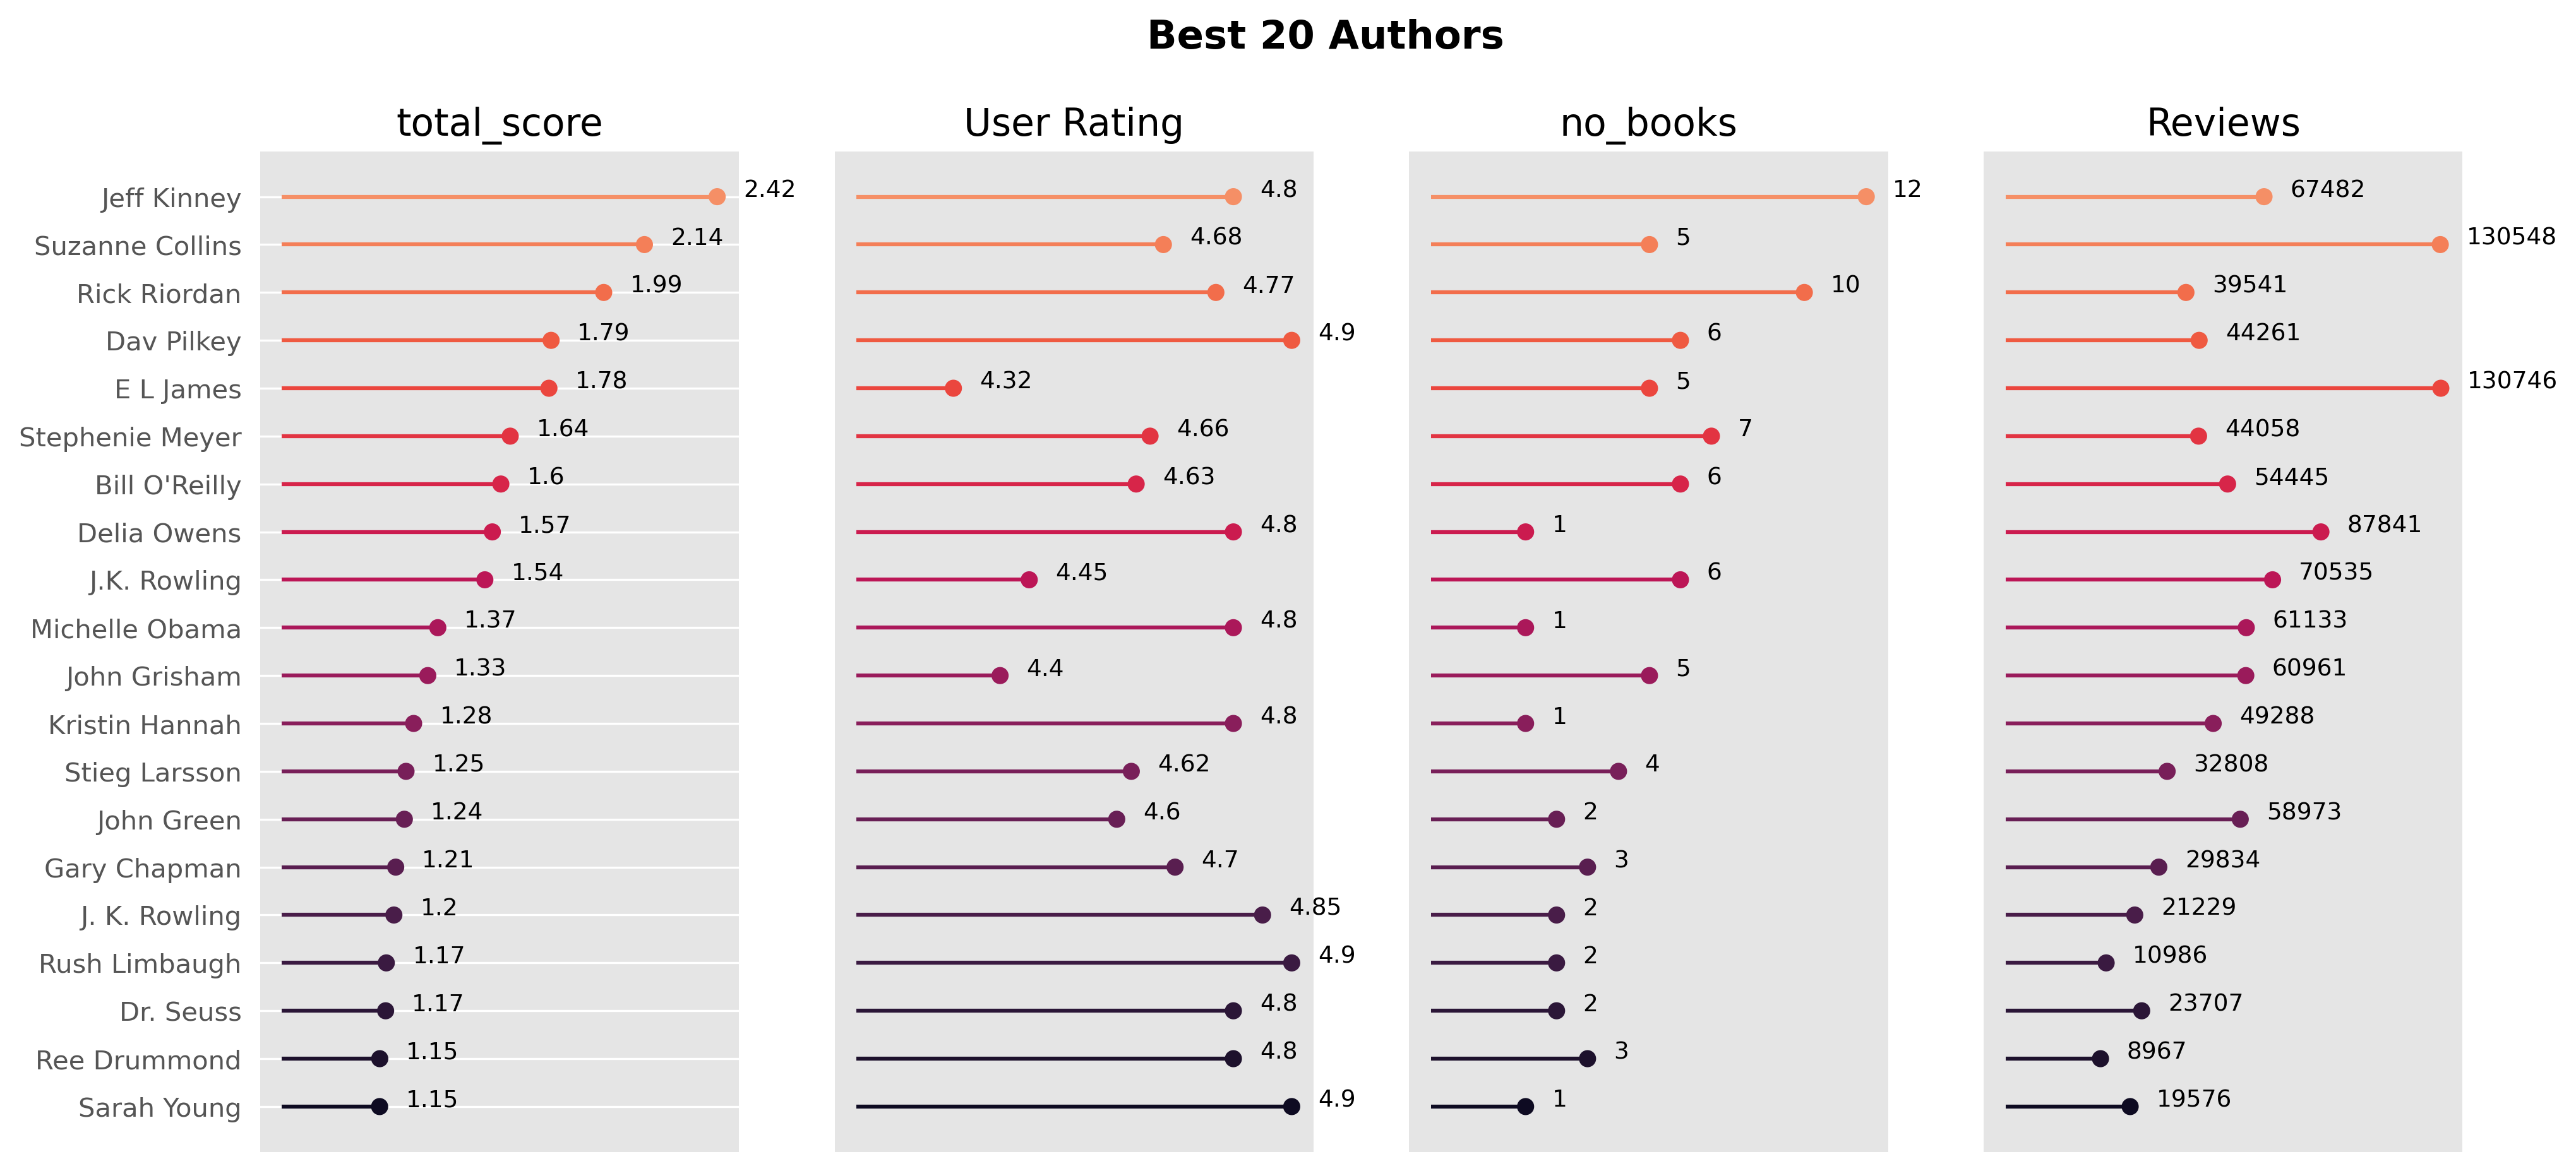

In [21]:
c = sns.color_palette("rocket",25)[:20]
fig =plt.figure(figsize=(15,7))
for col,i in zip(b_author.columns,range(1,len(b_author.columns)+1)):
    ax = fig.add_subplot(1,len(b_author.columns),i)
    ax.hlines(b_author.index,xmin=b_author[col].min()-b_author[col].std(), xmax=b_author[col],color=c)
    ax.scatter(b_author[col],b_author.index,color=c)
    for key in ax.spines:
        ax.spines[key].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks([])
    ax.set_title(col)
    for v,ii in zip(b_author[col],range(len(b_author[col]))):
        xtext=v+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.055
        plt.annotate(round(v,2),xy=(v,ii),xytext=(xtext,ii),fontsize=9)
    if i > 1 :
        ax.set_yticks([])
plt.suptitle('Best 20 Authors',fontsize=15,fontweight="bold")
plt.show()

In [22]:
#INTERACTIVE PLOTLY SCATTERPLOTS
#VISUALIZING AVG. REVIEWS-AVG. RATINGS RELATIONSHIP OF TOP 10 AUTHORS WITH HIGHEST AVG. REVIEWS:

df1 = df.groupby('Author').mean().sort_values('Reviews',ascending=False).reset_index().head(10)

fig = px.scatter(df1, x='User Rating', y='Reviews', color='Author')

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [24]:
df1 = df.groupby('Author').mean().sort_values('Price',ascending=False).reset_index().head(10)

fig = px.scatter(df1, x='User Rating', y='Price', color='Author')

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [70]:
#Best Selling books
b_book = df.groupby('Name').agg({'User Rating':'mean','Name':'size','Reviews':'mean'})
b_book.columns = ['User Rating', 'no_years_best_selling','Reviews']
b_book['total_score'] = ((b_book-b_book.min())/(b_book.max()-b_book.min())).sum(axis=1)
b_book = b_book.sort_values('total_score',ascending=False).head(20).sort_values('total_score')
b_book = b_book[['total_score','User Rating','no_years_best_selling','Reviews']]

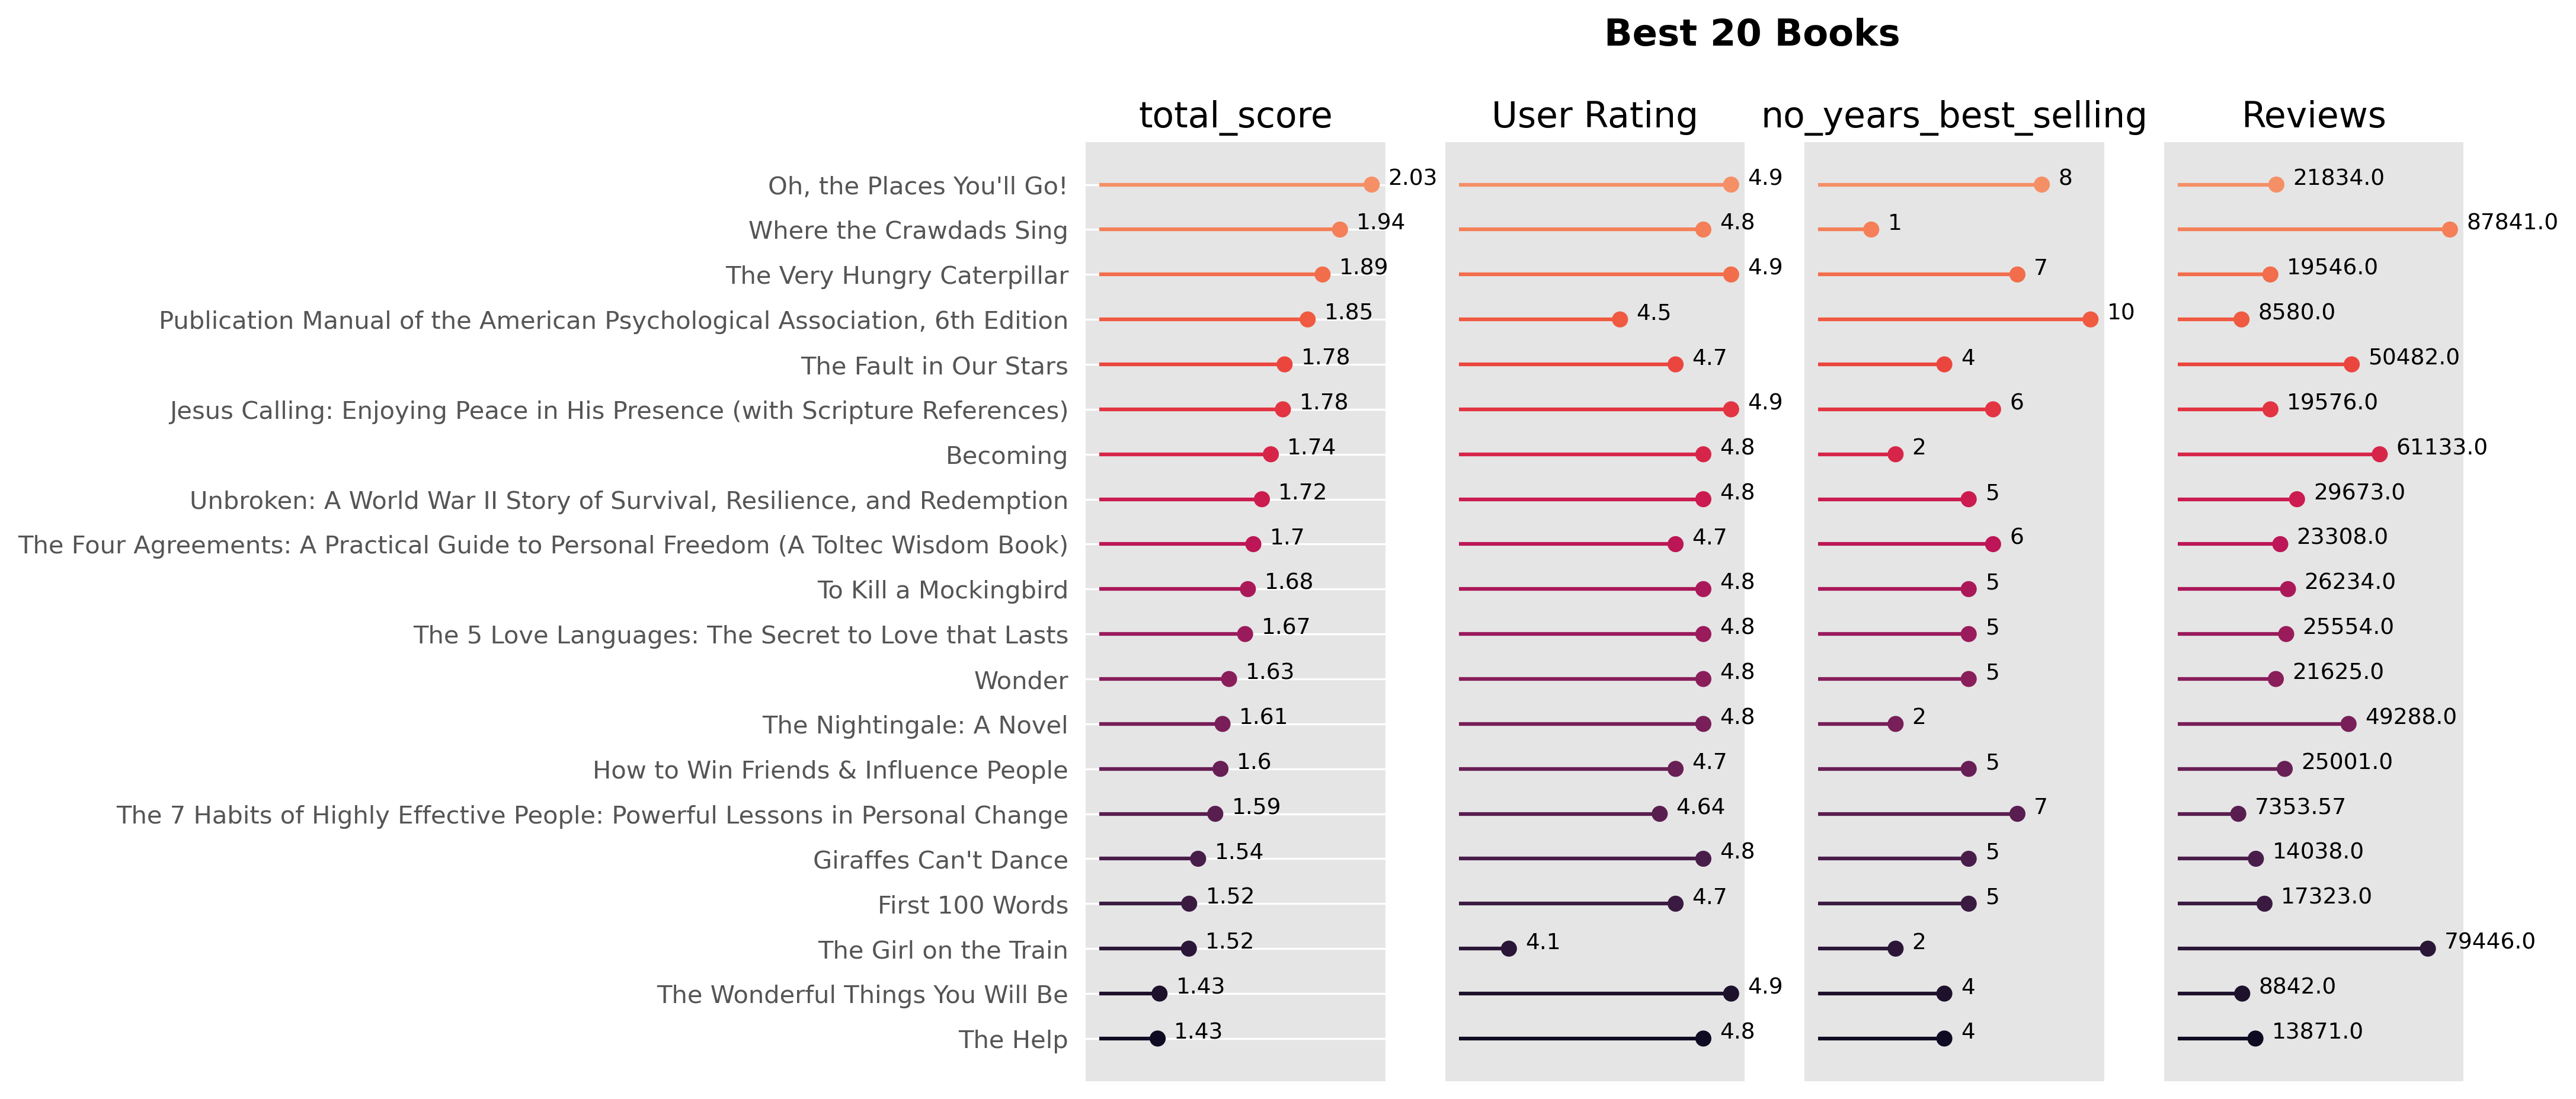

In [71]:
fig =plt.figure(figsize=(10,7))
for col,i in zip(b_book.columns,range(1,len(b_book.columns)+1)):
    ax = fig.add_subplot(1,len(b_book.columns),i)
    ax.hlines(b_book.index,xmin=b_book[col].min()-b_book[col].std(), xmax=b_book[col],color=c)
    ax.scatter(b_book[col],b_book.index,color=c)
    for key in ax.spines:
        ax.spines[key].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks([])
    ax.set_title(col)
    for v,ii in zip(b_book[col],range(len(b_book[col]))):
        xtext=v+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.055
        plt.annotate(round(v,2),xy=(v,ii),xytext=(xtext,ii),fontsize=9)
    if i > 1 :
        ax.set_yticks([])
plt.suptitle('Best 20 Books',fontsize=15,fontweight="bold")
plt.show()


In [ ]:
#Our criteria that we used to rate the top 20 books are based on their average User Rating,
#How many years it has been best selling, and the average number of reviews.We gave each book a total 
#score based on what it got in each stander.

In [25]:
#Year 2019 Analysed

df1=df[df['Year']==2019]

'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold("**2019 Bestsellers are Non-Fiction Majorly**")
py.iplot([pie_plot(df1['Genre'].value_counts(), ['magenta', 'cyan'], 'GENRE')])

**2019 Bestsellers are Non-Fiction Majorly**

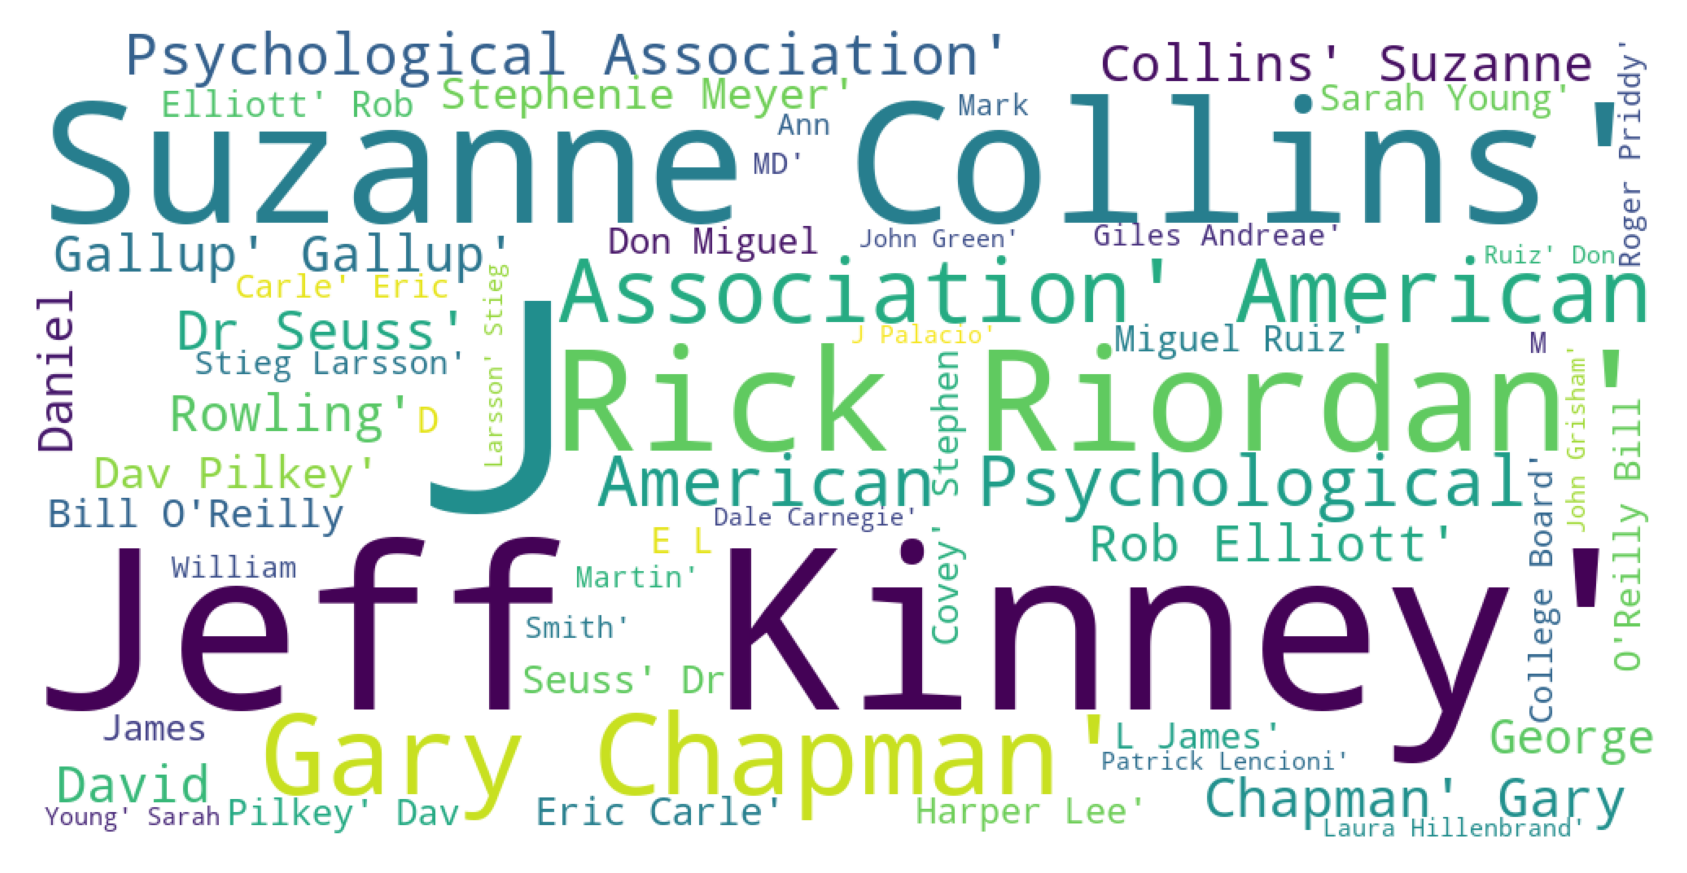

In [27]:
imp_words = df['Author'].to_list()

wordcloud = WordCloud(width = 1000, height = 500, 
                background_color ='White', 
                min_font_size = 15).generate(str(imp_words))
plt.figure(figsize = (7,7)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

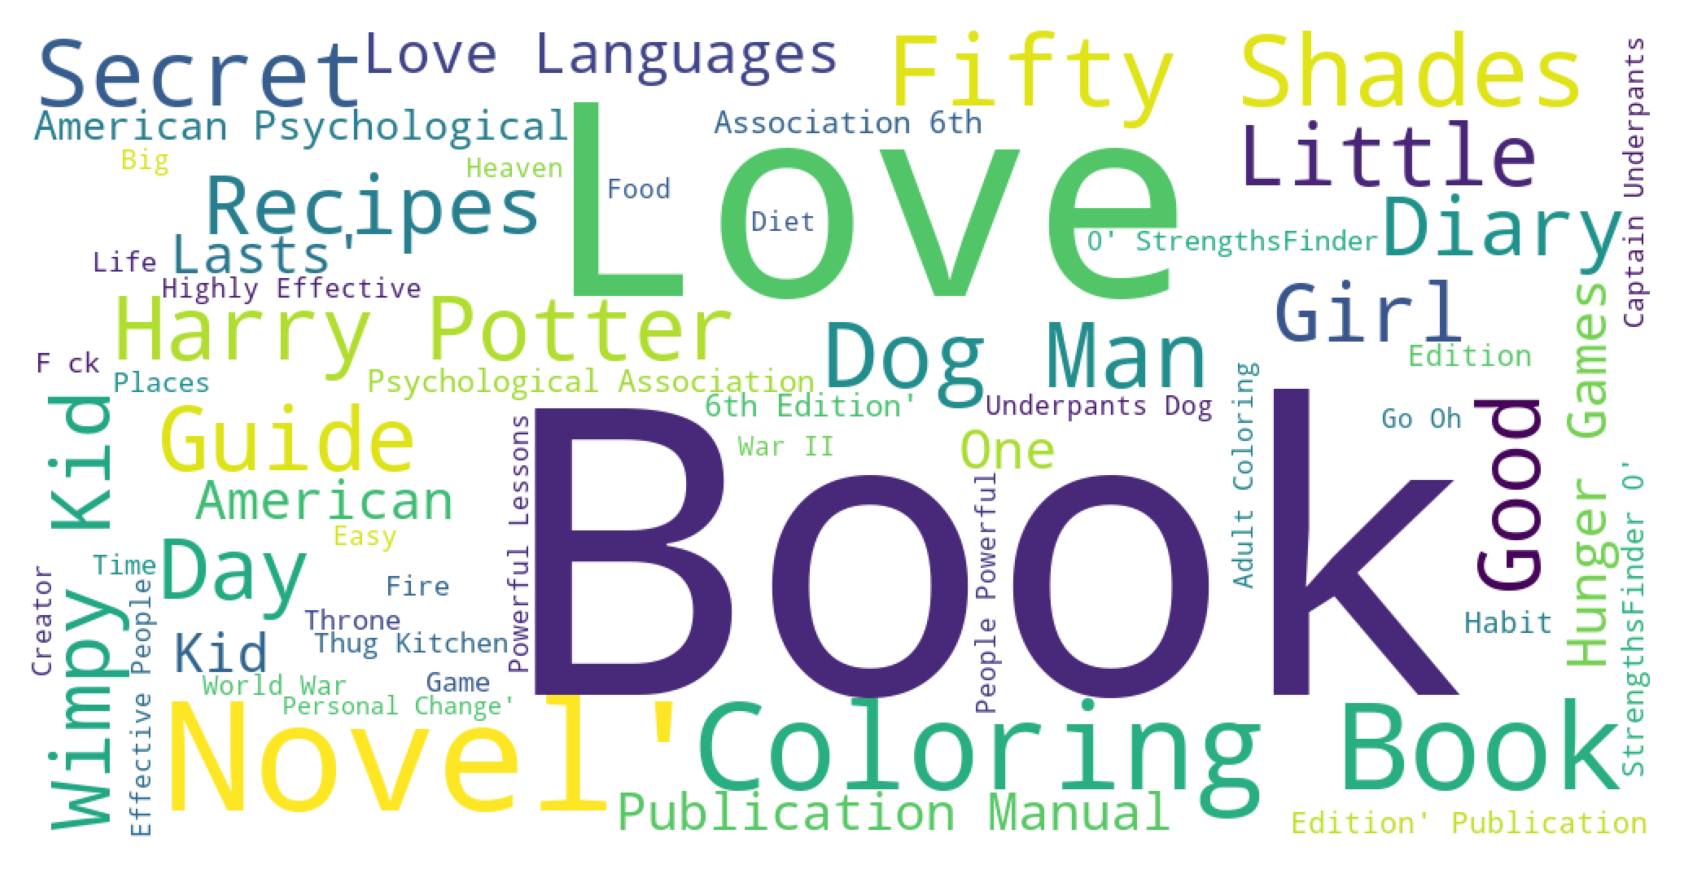

In [28]:
imp_words = df['Name'].to_list()

wordcloud = WordCloud(width = 1000, height = 500, 
                background_color ='White', 
                min_font_size = 15).generate(str(imp_words))
plt.figure(figsize = (7,7)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

In [32]:
#predicting user rating of book 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


LE=LabelEncoder()

LE.fit(df['Genre'])
df['Genre']=LE.transform(df['Genre'])
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


In [33]:
col =["Reviews","Price","Year","Genre"]
# X =df.[[col]].values 
X =df.iloc[:,3:8].values 
y =df[["User Rating"]]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# import 
from sklearn.linear_model import LinearRegression

# object
model = LinearRegression()
# training - > fit

model.fit(X_train, y_train)

LinearRegression()

In [36]:
Prediction=model.predict(X_test)

In [37]:
Prediction.shape

(110, 1)

In [38]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.22955784515261424


In [39]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
m1 = RandomForestRegressor()
m1.fit(X_train, y_train)

<ipython-input-39-1928909dbeab>:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()

In [40]:
Prediction=m1.predict(X_test)

In [41]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.20540753283522603


In [42]:
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor
m2 = GradientBoostingRegressor()
m2.fit(X_train, y_train)

/home/sudin101/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor()

In [43]:
Prediction=m2.predict(X_test)

In [44]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.21067345450064404


In [45]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=11).fit(X_train , y_train)

In [46]:
Prediction=dt.predict(X_test)

In [47]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.2472420738128645
